In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

import matplotlib.pyplot as plt

In [2]:
comments_db = sqlite3.connect("../database/test.db") # Create symbolic link to db you want to query.
cursor = comments_db.cursor()
cursor.execute("""
                SELECT ArticleURL, EditorSelection, COUNT(*) 
                FROM Articles JOIN Comments ON ArticleURL = URL 
                GROUP BY ArticleURL, EditorSelection
                """)
all_rows = cursor.fetchall()
comments_db.commit()
cursor.close()

ValueError: x must have at least one data point

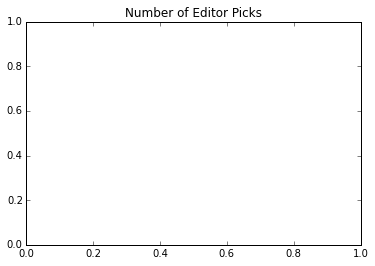

In [3]:
plt.title('Number of Editor Picks')
plt.hist([row[2] for row in all_rows if row[1] == 1], log=True, bins=30)
plt.xlabel('Number of ')
plt.figure()
plt.title('Not Editor Picks')
plt.hist([row[2] for row in all_rows if row[1] == 0], log=True, bins=30)
plt.show()

In [41]:
comments_db = sqlite3.connect("../comments.db") # Create symbolic link to db you want to query.
cursor = comments_db.cursor()
cursor.execute("""
                SELECT ArticleURL,
                       COUNT(CASE EditorSelection WHEN 0 THEN 1 ELSE null END),
                       COUNT(CASE EditorSelection WHEN 1 THEN 1 ELSE null END)
                FROM Articles JOIN Comments ON ArticleURL = URL 
                GROUP BY ArticleURL
                """)
dem_rows = cursor.fetchall()
comments_db.commit()
cursor.close()

[(u'http://6thfloor.blogs.nytimes.com/2013/04/15/behind-the-cover-story-jonathan-van-meter-on-being-anthony-weiners-shrink/',
  7,
  0),
 (u'http://6thfloor.blogs.nytimes.com/2013/07/08/behind-the-cover-story-mark-leibovich-on-being-part-of-a-washington-scandal/',
  1,
  0),
 (u'http://6thfloor.blogs.nytimes.com/2013/09/23/four-ways-to-improve-the-culture-of-commenting/',
  72,
  0),
 (u'http://6thfloor.blogs.nytimes.com/2014/05/10/under-cover-martin-schoeller-on-photographing-timothy-geithner/',
  2,
  0),
 (u'http://6thfloor.blogs.nytimes.com/2014/05/12/behind-the-cover-story-andrew-ross-sorkin-on-timothy-geithner-the-bailout-and-the-banks/',
  1,
  0),
 (u'http://6thfloor.blogs.nytimes.com/2014/07/07/behind-the-cover-story-sam-tanenhaus-on-the-g-o-p-s-new-intellectuals/',
  6,
  0),
 (u'http://6thfloor.blogs.nytimes.com/2014/08/12/did-kasparovs-outspoken-nature-cost-him-the-election/',
  1,
  0),
 (u'http://6thfloor.blogs.nytimes.com/2014/09/03/9-things-you-maybe-didnt-know-about-mi

In [42]:
perc_data = [row[2] / float(row[1] + row[2]) for row in dem_rows]

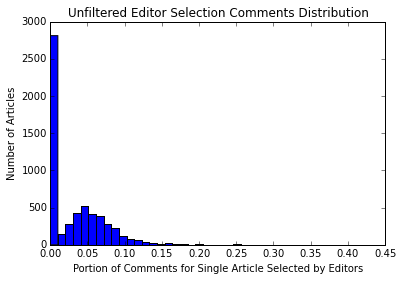

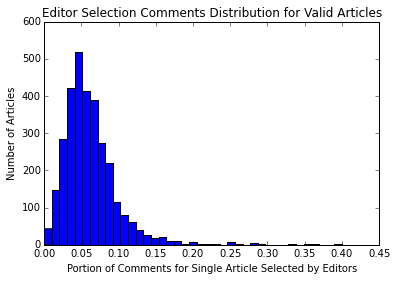

In [101]:
plt.hist([perc for perc in perc_data], bins=np.linspace(0, 0.4, 40))
plt.title('Unfiltered Editor Selection Comments Distribution')
plt.xlabel('Portion of Comments for Single Article Selected by Editors')
plt.ylabel('Number of Articles')
plt.figure()
plt.hist([perc for perc in perc_data if perc > 0], bins=np.linspace(0, 0.4, 40))
plt.title('Editor Selection Comments Distribution for Valid Articles')
plt.xlabel('Portion of Comments for Single Article Selected by Editors')
plt.ylabel('Number of Articles')
plt.show()

In [69]:
comments_db = sqlite3.connect("../comments.db") # Create symbolic link to db you want to query.
cursor = comments_db.cursor()
cursor.execute("""
                SELECT EditorSelection, COUNT(*)
                FROM Articles JOIN Comments ON ArticleURL = URL
                WHERE ArticleURL IN (
                                    SELECT DISTINCT ArticleURL
                                    FROM Comments
                                    WHERE EditorSelection = 1
                                    )
                GROUP BY EditorSelection
                """)
dem_rows = cursor.fetchall()
comments_db.commit()
cursor.close()
dem_rows[1][1] / float( dem_rows[1][1] + dem_rows[0][1] ) # Percent w 0s is 0.04446026997966744, w/o is 0.05092023823767155

0.05092023823767155

In [70]:
comments_db = sqlite3.connect("../comments.db") # Create symbolic link to db you want to query.
cursor = comments_db.cursor()
cursor.execute("""
                SELECT EditorSelection,
                    CreateDate - (SELECT MIN(CreateDate) FROM Comments AS C2 WHERE C2.ArticleURL = C1.ArticleURL)
                FROM Comments AS C1
                """)
dem_rows = cursor.fetchall()
comments_db.commit()
cursor.close()

Num of really old is 31756.


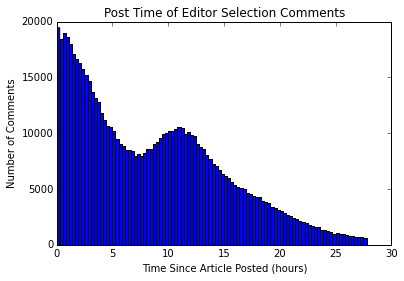

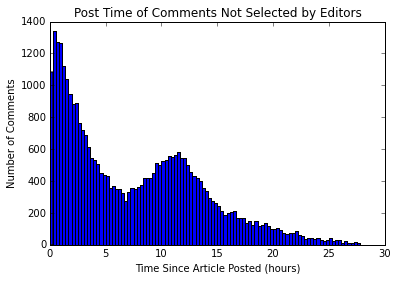

In [118]:
print 'Num of really old is %d.' % sum(1 for row in dem_rows if row[1] > 1e5)
plt.hist([row[1] / 3600.0 for row in dem_rows if row[1] <= 1e5 and row[0] == 0], bins=100)
plt.title('Post Time of Editor Selection Comments')
plt.xlabel('Time Since Article Posted (hours)')
plt.ylabel('Number of Comments')
plt.figure()
plt.hist([row[1] / 3600.0 for row in dem_rows if row[1] <= 1e5 and row[0] == 1], bins=100)
plt.title('Post Time of Comments Not Selected by Editors')
plt.xlabel('Time Since Article Posted (hours)')
plt.ylabel('Number of Comments')


In [103]:
comments_db = sqlite3.connect("../comments.db") # Create symbolic link to db you want to query.
cursor = comments_db.cursor()
cursor.execute("""
                SELECT MIN(CreateDate)
                FROM Comments
                GROUP BY ArticleURL
                """)
dem_rows3 = cursor.fetchall()
comments_db.commit()
cursor.close()
plt.hist([row[0] % (24 * 60 * 60) - 5 * 3600 for row in dem_rows3], bins=200)
42